# transformer笔记

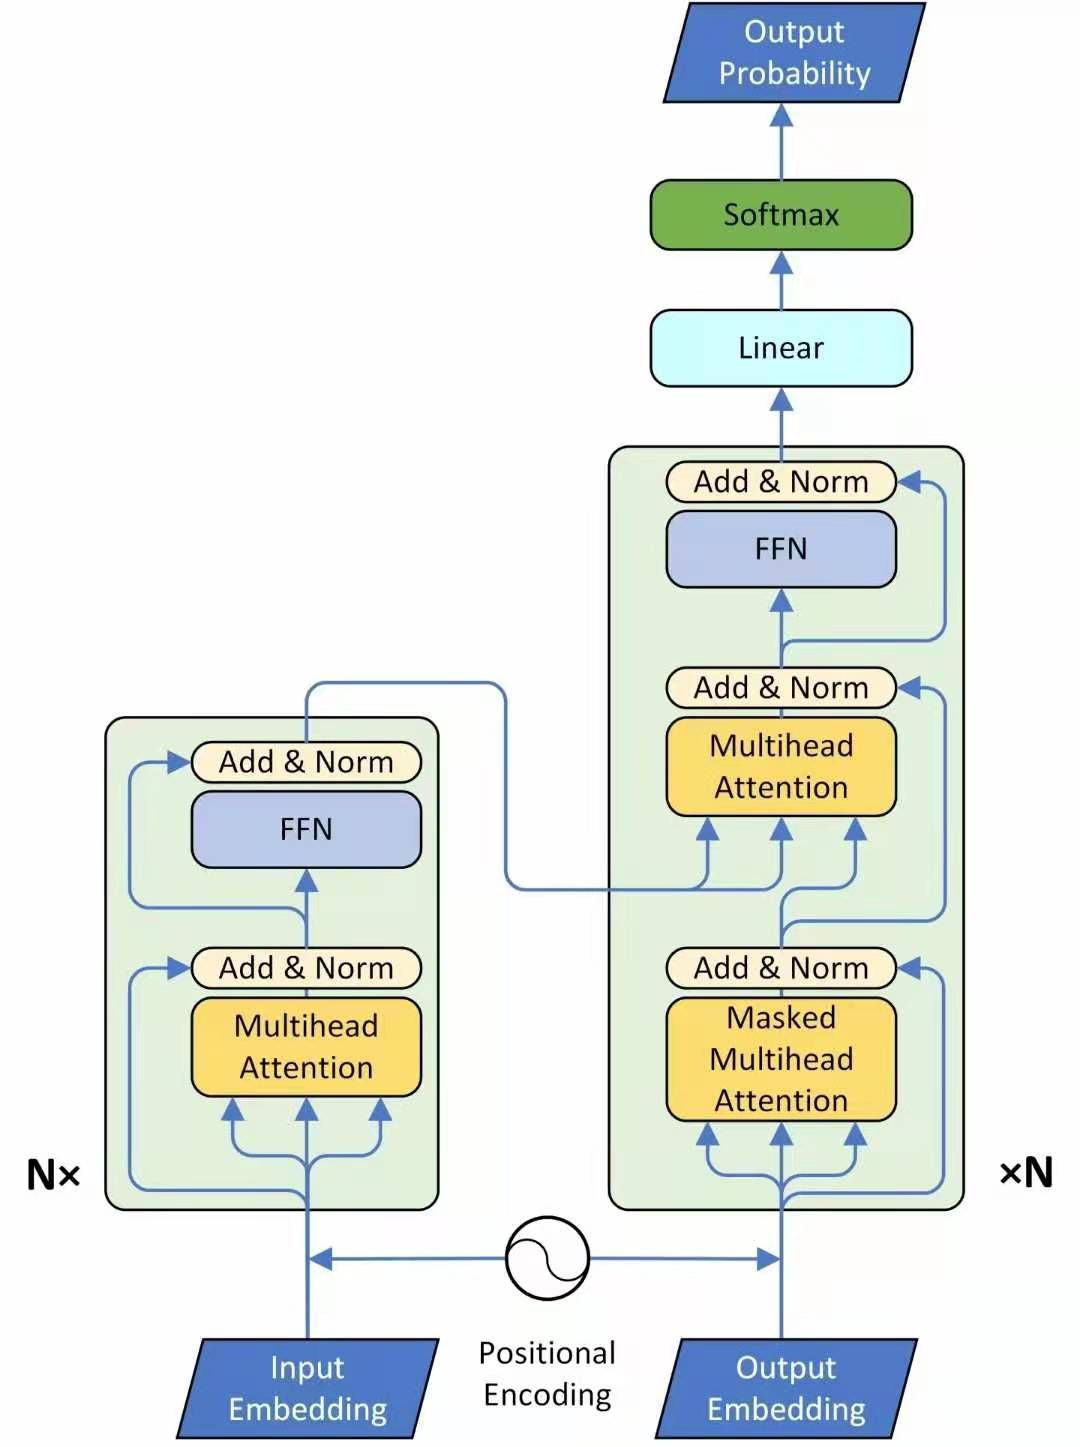

### 1、关于多头注意力（mutil head self-attention）的细节

在BERT、transformer等文章中看到大多数的多头经过多头concat之后，再通过一个设计好尺寸的MLP使得经过一个多头后的输出size与输入size都相同，经过一定层的多头（所有多头架构相同）后size都不变，这里联想到为甚不能像cnn的卷积操作一样，设计不同输入输出通道的卷积核，不断减少分辨率，增加通道数；对应到多头层就是增加头数减少每一个词嵌入的向量个数。

### 2、关于pos encoding的细节

我们观察到，在添加位置编码的时候通常操作是对embedding直接相加pos embedding，可以想到pos embedding与embdding直接混合是否还能体现出位置的信息，为何不对编码与位置信息做concat操作，对此的其中一个解释是：（来自知乎科技猛兽文章）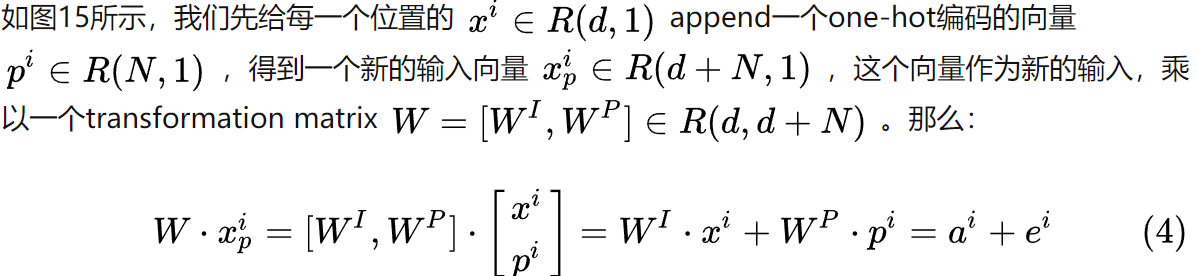

### 3、关于pos encoding的相对位置有效性

如固定的sin、cos pos词嵌入方法
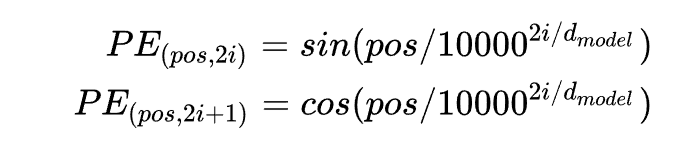


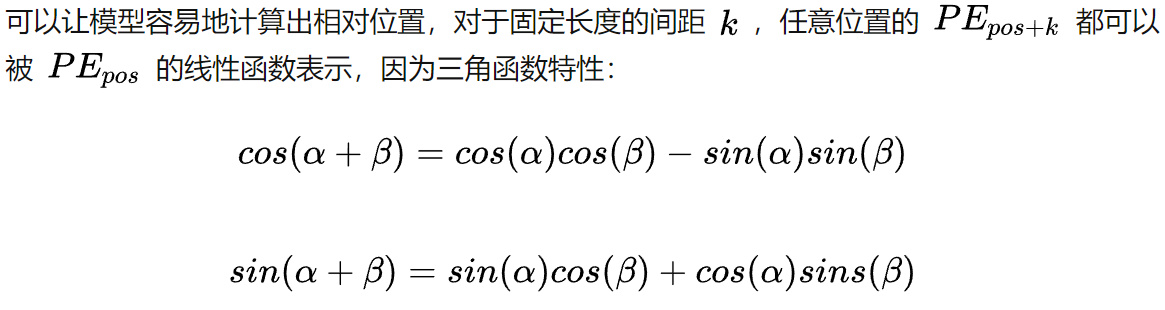

### 4、关于mask细节
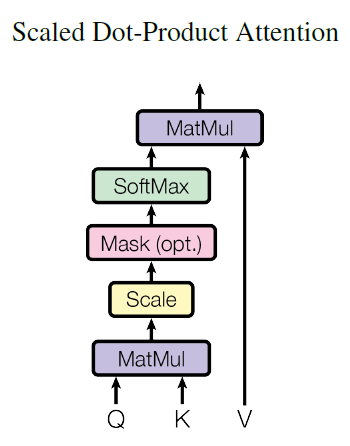
在decoder训练过程中的mask在softmax之前，并且是置一个极小的负值，再进行softmax时对应位置的token就被置为零了，而不能在softmax层中直接置0，否则softmax之后相加和就不为1了。

### 5、架构训练与测试的区别：
在测试时类似rnn先给解码器输入\<Begin>的token然后依次由解码器算出t+1时刻的输出，即编码器可以对所有数据做并行处理，解码的时候还是根据上一个时刻获得的token来计算。
<br>在训练时则可以并行处理，不过防止self-attention看到t+1时刻的信息需要添加上述的mask
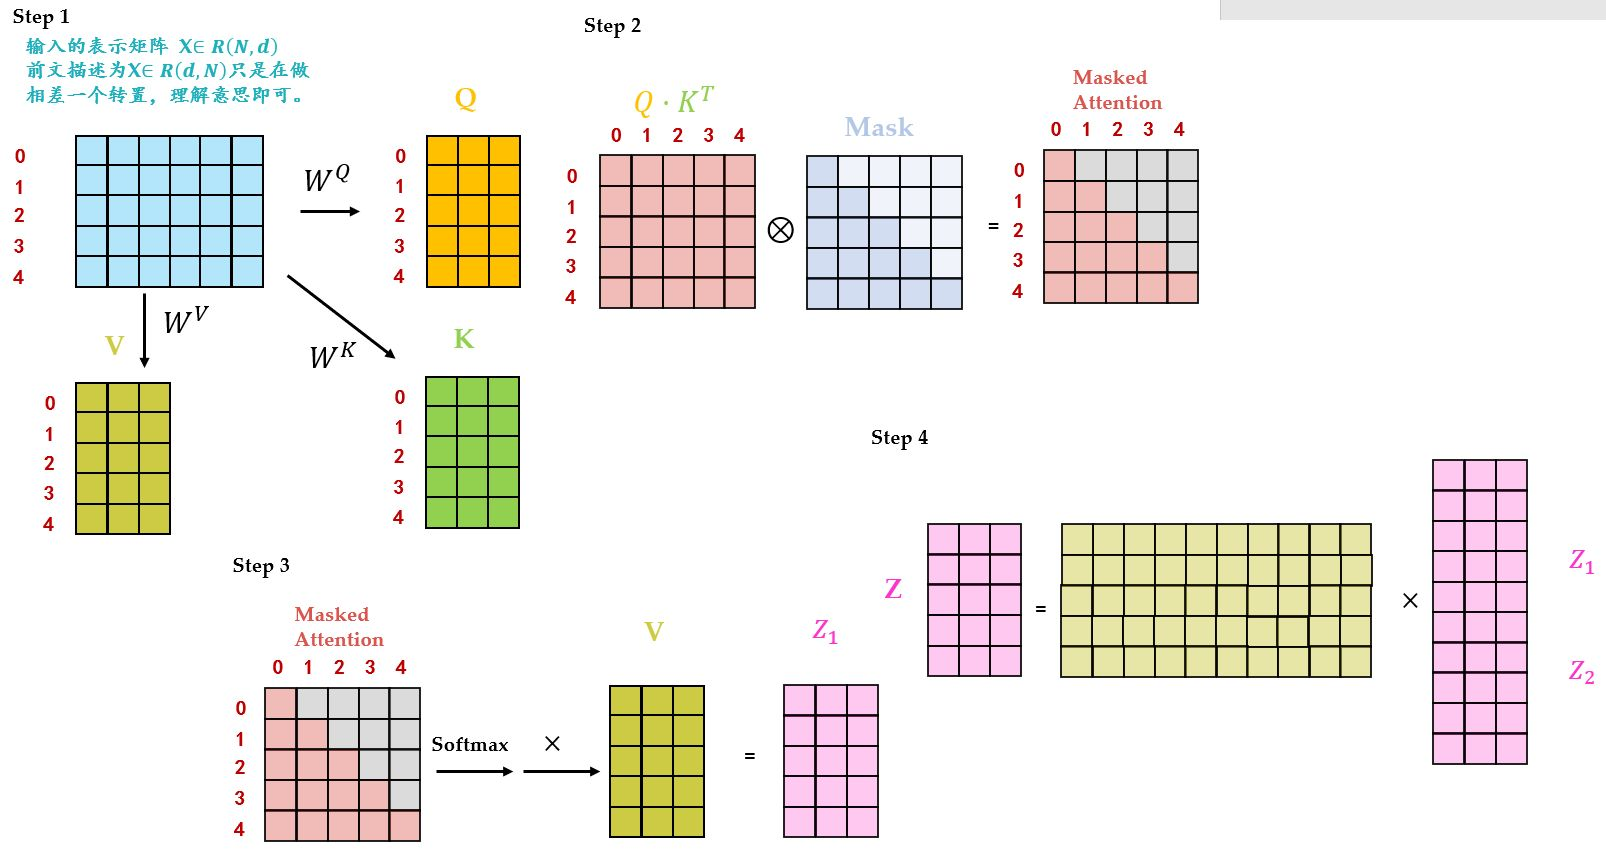